<a href="https://colab.research.google.com/github/Meera-Ajay-25/NLP-projects/blob/main/Nlp_twitter_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project: **Twitter Tweets Validation Using NLP**


In [ ]:
import pandas as pd
df=pd.read_csv("/content/twitter_validation.csv",names=('Id','Location','Target','Text'))
df

,Id,Location,Target,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.dtypes

Id           int64
Location    object
Target      object
Text        object
dtype: object

In [ ]:
df.isna().sum()

Id          0
Location    0
Target      0
Text        0
dtype: int64

In [ ]:
df['Target'].value_counts()

Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: Target, dtype: int64

<Axes: xlabel='Target', ylabel='count'>

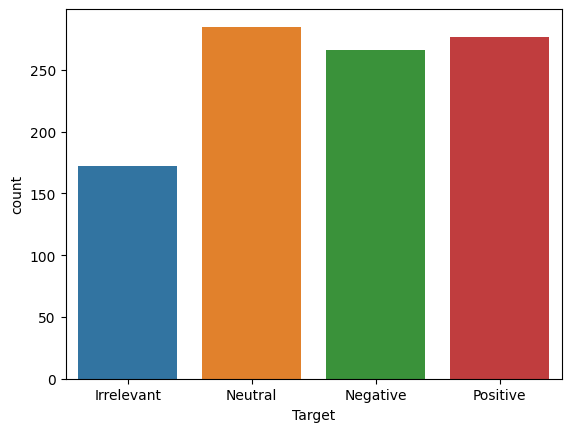

In [ ]:
import seaborn as sns
sns.countplot(x='Target',data=df)

In [ ]:
#dropping irrelevant comments in target
df.drop(df.index[(df['Target']=='Irrelevant')],axis=0,inplace=True)

In [ ]:
df

,Id,Location,Target,Text
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df

,Id,Location,Target,Text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
823,314,Amazon,Negative,Please explain how this is possible! How can t...
824,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
825,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
826,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
#assigning -1 0 and 1 to target column
df['Target']=df['Target'].map({'Positive':1,'Neutral':0,'Negative':-1})

In [ ]:
df

,Id,Location,Target,Text
0,352,Amazon,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,-1,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,-1,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,0,Now the President is slapping Americans in the...
4,6273,FIFA,-1,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
823,314,Amazon,-1,Please explain how this is possible! How can t...
824,9701,PlayStation5(PS5),1,Good on Sony. As much as I want to see the new...
825,2652,Borderlands,1,Today sucked so it’s time to drink wine n play...
826,8069,Microsoft,1,Bought a fraction of Microsoft today. Small wins.


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tweets=df.Text
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp I’ve had Madeleine McCann in my cel...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so it’s time to drink wine n play...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: Text, Length: 828, dtype: object

**Tokenization**

In [ ]:
from nltk import TweetTokenizer
tk=TweetTokenizer()
tweets=tweets.apply(lambda x:tk.tokenize(x))
tweets

0      [BBC, News, -, Amazon, boss, Jeff, Bezos, reje...
1      [@Microsoft, Why, do, I, pay, for, WORD, when,...
2      [CSGO, matchmaking, is, so, full, of, closet, ...
3      [Now, the, President, is, slapping, Americans,...
4      [Hi, @EAHelp, I, ’, ve, had, Madeleine, McCann...
                             ...                        
823    [Please, explain, how, this, is, possible, !, ...
824    [Good, on, Sony, ., As, much, as, I, want, to,...
825    [Today, sucked, so, it, ’, s, time, to, drink,...
826    [Bought, a, fraction, of, Microsoft, today, .,...
827    [Johnson, &, Johnson, to, stop, selling, talc,...
Name: Text, Length: 828, dtype: object

In [ ]:
from nltk import TweetTokenizer
tk=TweetTokenizer()
tweets=tweets.apply(lambda y:" ".join(y))
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp I ’ ve had Madeleine McCann in my c...
                             ...                        
823    Please explain how this is possible ! How can ...
824    Good on Sony . As much as I want to see the ne...
825    Today sucked so it ’ s time to drink wine n pl...
826    Bought a fraction of Microsoft today . Small w...
827    Johnson & Johnson to stop selling talc baby po...
Name: Text, Length: 828, dtype: object

In [ ]:
tweets=tweets.str.replace('[^a-zA-Z0-9]+'," ")
tweets

<ipython-input-16-3b947e35decc>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets=tweets.str.replace('[^a-zA-Z0-9]+'," ")


0      BBC News Amazon boss Jeff Bezos rejects claims...
1       Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi EAHelp I ve had Madeleine McCann in my cell...
                             ...                        
823    Please explain how this is possible How can th...
824    Good on Sony As much as I want to see the new ...
825    Today sucked so it s time to drink wine n play...
826     Bought a fraction of Microsoft today Small wins 
827    Johnson Johnson to stop selling talc baby powd...
Name: Text, Length: 828, dtype: object

**Remove stop words**

In [ ]:
from nltk.corpus import stopwords
sw=stopwords.words('english')
tweets=tweets.apply(lambda x:[i for i in tk.tokenize(x) if i.lower() not in sw]).apply(lambda y:" ".join(y))
tweets

0      BBC News Amazon boss Jeff Bezos rejects claims...
1      Microsoft pay WORD functions poorly SamsungUS ...
2      CSGO matchmaking full closet hacking truly awf...
3      President slapping Americans face really commi...
4      Hi EAHelp Madeleine McCann cellar past 13 year...
                             ...                        
823    Please explain possible let companies overchar...
824    Good Sony much want see new PS5 going right mu...
825    Today sucked time drink wine n play borderland...
826           Bought fraction Microsoft today Small wins
827    Johnson Johnson stop selling talc baby powder ...
Name: Text, Length: 828, dtype: object

**Stemming**

In [ ]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
tweets=tweets.apply(lambda x:[ ps.stem(token.lower()) for token in tk.tokenize(x)]).apply(lambda y: " ".join(y))

In [ ]:
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft pay word function poorli samsungu ch...
2           csgo matchmak full closet hack truli aw game
3      presid slap american face realli commit unlaw ...
4      hi eahelp madelein mccann cellar past 13 year ...
                             ...                        
823    pleas explain possibl let compani overcharg sc...
824    good soni much want see new ps5 go right much ...
825    today suck time drink wine n play borderland s...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder u c...
Name: Text, Length: 828, dtype: object

In [ ]:
#length 2, less remove
tweets=tweets.apply(lambda x:[i for i in tk.tokenize(x) if len(i)>2]).apply(lambda y: " ".join(y))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft pay word function poorli samsungu ch...
2              csgo matchmak full closet hack truli game
3      presid slap american face realli commit unlaw ...
4      eahelp madelein mccann cellar past year littl ...
                             ...                        
823    pleas explain possibl let compani overcharg sc...
824    good soni much want see new ps5 right much import
825    today suck time drink wine play borderland sun...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder can...
Name: Text, Length: 828, dtype: object

**TFIDF vectorisation**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data_vec=vec.fit_transform(tweets)
data_vec

<828x3735 sparse matrix of type '<class 'numpy.float64'>'
	with 10282 stored elements in Compressed Sparse Row format>

In [ ]:
print(data_vec)   #X

  (0, 660)	0.2608257828483461
  (0, 974)	0.2608257828483461
  (0, 1097)	0.23509805002803952
  (0, 1956)	0.13277165480466424
  (0, 283)	0.22681557001542715
  (0, 829)	0.17354914655342313
  (0, 776)	0.21432663830218204
  (0, 2717)	0.2608257828483461
  (0, 537)	0.2608257828483461
  (0, 1794)	0.24577602391989378
  (0, 602)	0.22681557001542715
  (0, 349)	0.1515362387424402
  (0, 2247)	0.38864111655856126
  (0, 509)	0.49155204783978756
  (1, 767)	0.4161828717954923
  (1, 2847)	0.4161828717954923
  (1, 2518)	0.4161828717954923
  (1, 1371)	0.4161828717954923
  (1, 3632)	0.37513078862713445
  (1, 2421)	0.3208628865332297
  (1, 2114)	0.25197453912206114
  (2, 1393)	0.1815002094658533
  (2, 3387)	0.3929690961082482
  (2, 1542)	0.3929690961082482
  (2, 793)	0.4518934574053684
  :	:
  (825, 3348)	0.3395996844494919
  (825, 3338)	0.2560582225152134
  (825, 600)	0.22981061112100945
  (825, 966)	0.2315686698425631
  (825, 3328)	0.21750175079084832
  (825, 3181)	0.2904718522758868
  (825, 2487)	0.17148

In [ ]:
data_vec.shape

(828, 3735)

In [ ]:
y=df['Target'].values
y

array([ 0, -1, -1,  0, -1,  1,  1,  1, -1,  1,  1, -1,  0, -1,  1,  1, -1,
        1, -1, -1,  0, -1,  0,  0, -1, -1,  1,  1, -1,  1, -1,  0,  0,  1,
        0,  1,  0,  0,  0,  1,  0, -1, -1, -1,  0,  1, -1, -1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  0, -1,  0, -1,  1, -1, -1,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1,
        0,  1,  0, -1,  1,  1,  0,  1,  0,  1, -1,  0,  0,  0, -1,  0, -1,
        0,  0,  1,  1,  0, -1, -1,  1, -1,  0, -1,  1,  0, -1,  0,  1,  0,
        1,  1,  0,  0,  0,  0,  1,  0,  1,  1, -1,  0,  0,  0,  0, -1,  0,
        1, -1,  0, -1,  0, -1, -1, -1,  1,  1,  1,  0,  0,  1,  0,  0,  0,
        1,  0, -1, -1,  0,  1,  1,  0,  1,  1,  0,  0, -1, -1, -1, -1,  1,
        0,  0,  1,  1,  1,  1, -1,  1,  1,  0, -1, -1, -1,  1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  0, -1,  0,  0,  1, -1,  1,  1,  0,  1,
       -1, -1,  1,  1,  1,  1,  0,  0,  1, -1,  0,  1,  0, -1,  0,  0, -1,
        1,  1, -1,  0,  1

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data_vec,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
sv=SVC()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
ad=AdaBoostClassifier()
models=[sv,dt,rf,ad]
for model in models:
  print(model)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  y_new=model.predict(vec.transform(['Bought a fraction of Microsoft today. Small wins.']))
  if y_new==1:
    print("Positive")
  elif y_new==0:
    print("Neutral")
  else:
    print("Negative")
  print(classification_report(y_test,y_pred))

SVC()
Positive
              precision    recall  f1-score   support

          -1       0.57      0.68      0.62        74
           0       0.61      0.63      0.62        91
           1       0.65      0.52      0.58        84

    accuracy                           0.61       249
   macro avg       0.61      0.61      0.61       249
weighted avg       0.61      0.61      0.61       249

DecisionTreeClassifier()
Positive
              precision    recall  f1-score   support

          -1       0.51      0.58      0.54        74
           0       0.54      0.64      0.59        91
           1       0.57      0.39      0.46        84

    accuracy                           0.54       249
   macro avg       0.54      0.54      0.53       249
weighted avg       0.54      0.54      0.53       249

RandomForestClassifier()
Positive
              precision    recall  f1-score   support

          -1       0.45      0.74      0.56        74
           0       0.65      0.64      0.64   